## Car MPG Prediction Model

Import Statements, Loading Dataset, Data Cleansing

In [15]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestRegressor



# Loading the dataset
data = pd.read_csv('auto-mpg.csv')

# Remove rows with '?' in them
data = data.replace('?','')

# Made horsepower numeric from object
data['horsepower'] = pd.to_numeric(data["horsepower"], errors='coerce')

data = data.dropna()

# Got just the car manufacturer
data['car mfg'] = data['car name'].str.split(' ').str[0]
del data['car name']

# Labeled the car mfg (gave int value)
le = LabelEncoder()
data['car mfg'] = le.fit_transform(data['car mfg'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car mfg       392 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 30.6 KB


EDA (Explaratory Data Analysis)

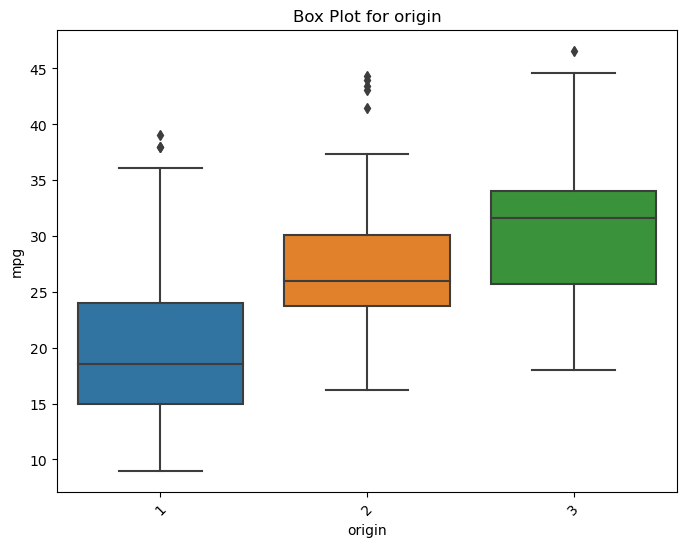

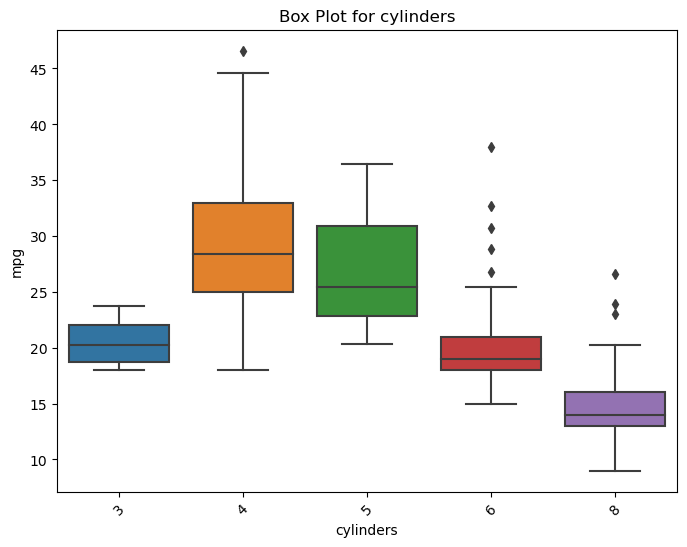

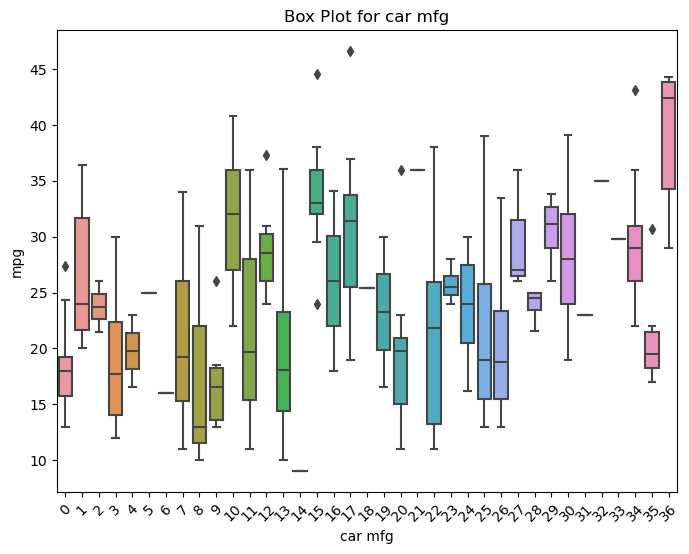

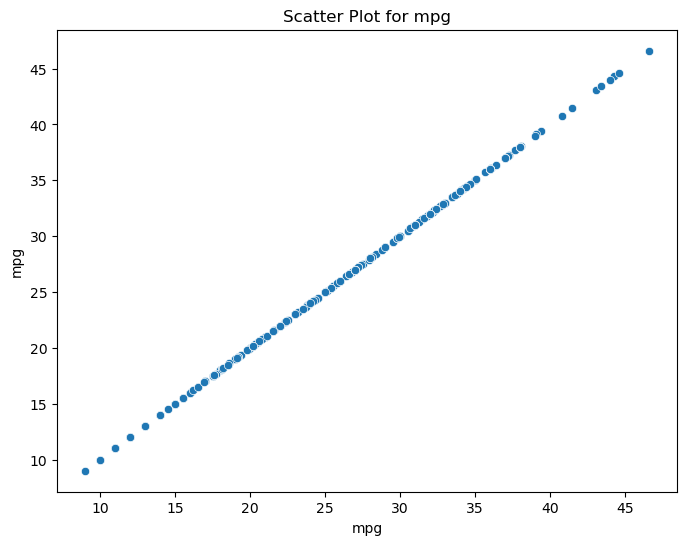

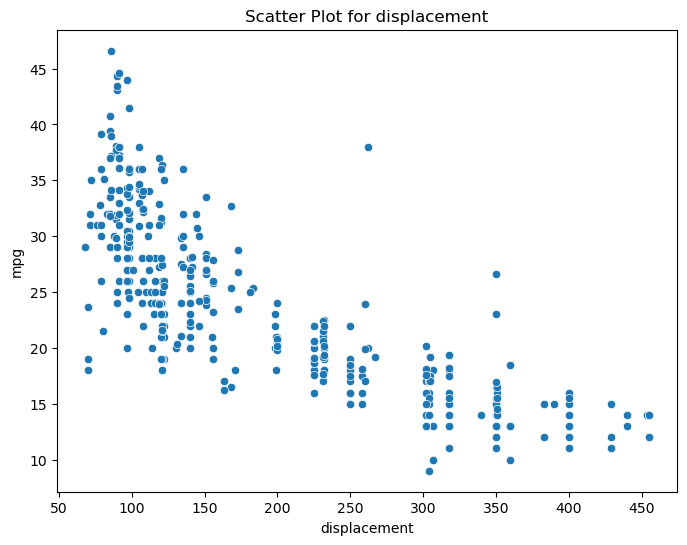

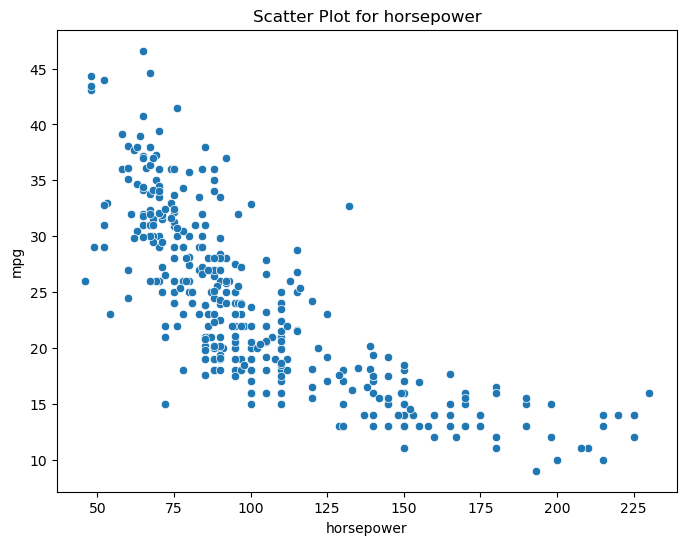

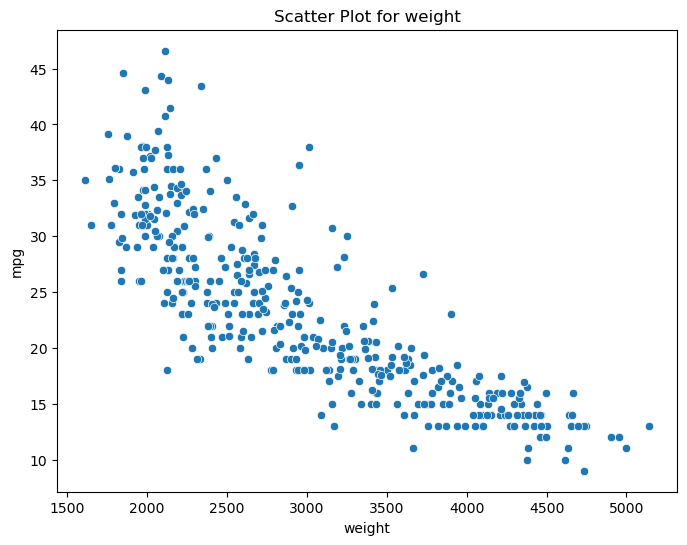

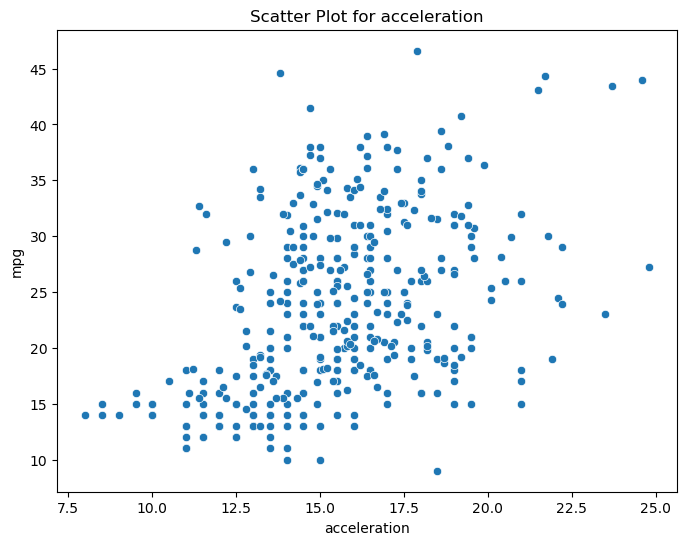

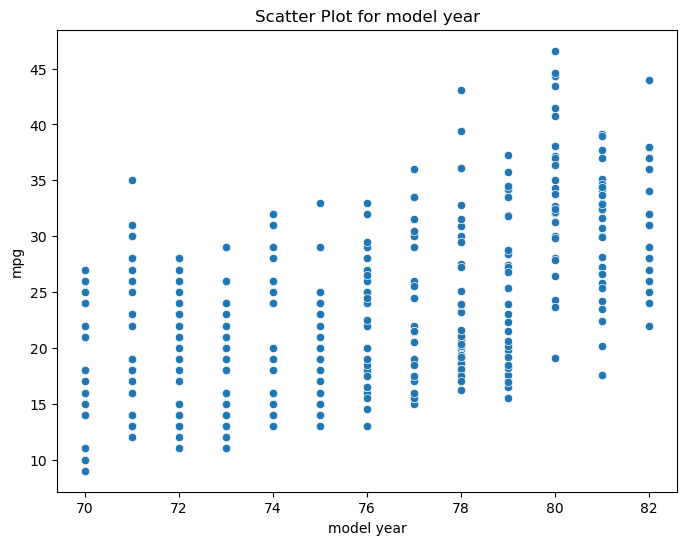

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separating categorical and continuous columns
categorical_cols = ['origin', 'cylinders','car mfg']  # categorical columns
continuous_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']  # continuous columns

# Box plots for categorical variables
for column in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, y='mpg', data=data)
    plt.title(f'Box Plot for {column}')
    plt.xticks(rotation=45)
    plt.show()

# Scatter plots for continuous variables
for column in continuous_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y='mpg', data=data)
    plt.title(f'Scatter Plot for {column}')
    plt.show()



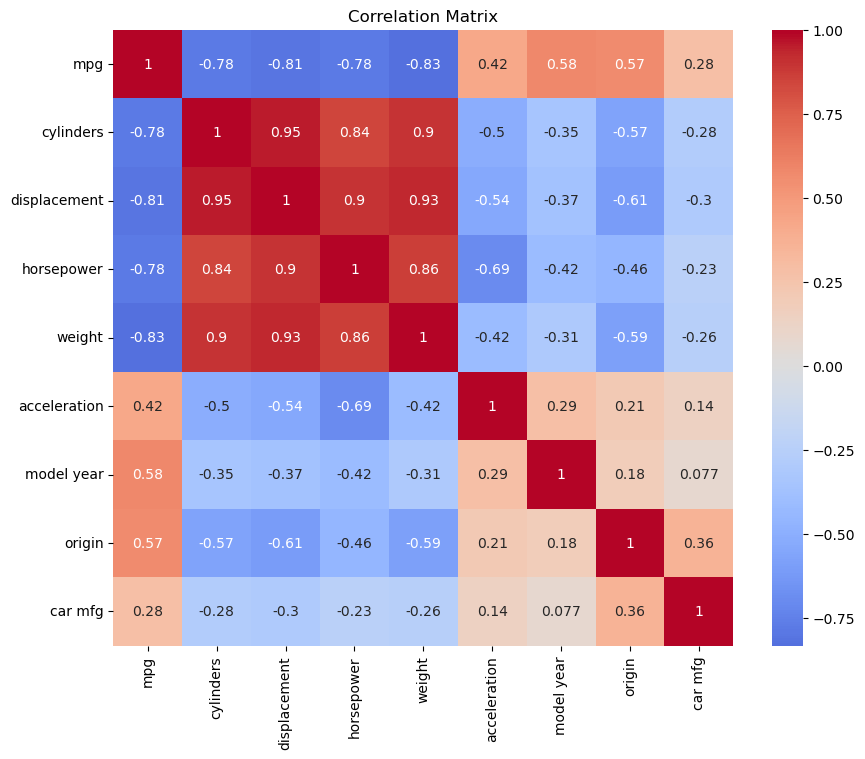

In [17]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()
# Can see which columns will have less correlation with MPG

In [18]:
#data = pd.read_csv('auto-mpg.csv')

# Columns: mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
#removing non correlated columns such as car mfg, origin, model year

 
X5 = data[['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration']]
y = data['mpg']

# Splitting data into training and testing sets 
x_train, X_test, y_train, y_test = train_test_split(X5, y, test_size = 0.2, random_state = 0)

Simple Linear Regression

In [19]:
regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)
print(regr.intercept_)
print(regr.coef_)

y_train_pred = regr.predict(x_train)
y_test_pred = regr.predict(X_test)

print(f"training R-squared = {r2_score(y_train, y_train_pred)}")
print(f"training R-squared = {r2_score(y_test, y_test_pred)}")

44.46648894772031
[-0.00600716 -0.33360403  0.00244779 -0.03274511  0.10423308]
training R-squared = 0.7097139425798664
training R-squared = 0.694257356779733


Ridge Regression

In [20]:
Ridge = linear_model.Ridge(alpha = 1)

Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
y_train_pred_Ridge = Ridge.predict(x_train)
y_test_pred_Ridge = Ridge.predict(X_test)

print(f"training R-squared = {r2_score(y_train, y_train_pred_Ridge)}")
print(f"training R-squared = {r2_score(y_test, y_test_pred_Ridge)}")

44.458220749961185
[-0.00600774 -0.32970837  0.00238777 -0.03273539  0.1041895 ]
training R-squared = 0.7097138743800318
training R-squared = 0.6942526603997959


In [21]:
Ridge = linear_model.Ridge(alpha = 100)

Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
y_train_pred_Ridge = Ridge.predict(x_train)
y_test_pred_Ridge = Ridge.predict(X_test)

print(f"training R-squared = {r2_score(y_train, y_train_pred_Ridge)}")
print(f"training R-squared = {r2_score(y_test, y_test_pred_Ridge)}")

44.16741235824661
[-0.00601893 -0.15330524 -0.00037525 -0.03270707  0.0973052 ]
training R-squared = 0.709564180583284
training R-squared = 0.6941930966102452


Lasso Regression

In [22]:
Lasso = linear_model.Lasso(alpha = 10)

Lasso.fit(x_train, y_train)

print(f" Intercept = {Lasso.intercept_}")
print(f" coefficient = {Lasso.coef_}")

y_train_pred_Lasso = Lasso.predict(x_train)
y_test_pred_Lasso = Lasso.predict(X_test)

print(f"training R-squared = {r2_score(y_train, y_train_pred_Lasso)}")
print(f"training R-squared = {r2_score(y_test, y_test_pred_Lasso)}")

 Intercept = 45.72992032625142
 coefficient = [-0.00671748 -0.         -0.00336201 -0.01570315  0.        ]
training R-squared = 0.704593883046309
training R-squared = 0.691230409665082


Quadratic needed for non-linear data (not necessarilly needed in this case)

In [23]:
poly = PolynomialFeatures(2, include_bias = False) # the initial columns of 1's not needed for LinearRegression()
X2 = poly.fit_transform(X5)
x_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 0)

reg = linear_model.LinearRegression()

reg.fit(x_train, y_train)
print(f"intercept = {reg.intercept_}")
print(f"coefficients = {reg.coef_}")
print(f"Quadratic Regression R-Squared = {r2_score(y, reg.predict(X2))}")

intercept = 95.75891805856278
coefficients = [ 4.12978072e-03 -1.09414413e+01 -3.09574002e-02 -2.52362095e-01
 -2.77614433e+00 -1.73271037e-06 -2.73725780e-04  3.77751727e-05
 -2.43122916e-05 -1.66218252e-05  6.04885206e-01 -3.25260086e-02
  7.03723684e-02  2.81861305e-01  1.65925204e-04  1.86355237e-04
 -6.57347959e-04 -7.89698150e-04 -2.48450768e-03  4.84051983e-02]
Quadratic Regression R-Squared = 0.7711090901764982


In [24]:
poly = PolynomialFeatures(3, include_bias = False) # the initial columns of 1's not needed for LinearRegression()
X3 = poly.fit_transform(X5)
x_train, X_test, y_train, y_test = train_test_split(X3, y, test_size = 0.2, random_state = 0)

reg3 = linear_model.LinearRegression()

reg3.fit(x_train, y_train)
print(f"intercept = {reg3.intercept_}")
print(f"coefficients = {reg3.coef_}")
print(f"Cubic Regression R-Squared = {r2_score(y, reg3.predict(X3))}")

intercept = -186.42733460555735
coefficients = [-1.61932183e-01 -5.39490605e+01  1.61714074e+00  3.53632678e+00
  5.36763828e+01 -2.90088559e-05 -2.65589957e-02  4.69968560e-04
  1.98510209e-03  2.17206258e-02  9.64053084e+00 -5.14010354e-01
  8.89928890e-01  4.30097936e+00  2.79103013e-03 -1.38675134e-02
 -8.60191655e-02 -2.39113400e-02 -6.59030506e-01 -3.60360871e+00
  3.99293885e-09 -9.80073645e-08 -9.48903007e-08  1.09301036e-07
 -1.71857206e-07  2.46507001e-03 -4.17470339e-05  2.41134017e-05
  2.74781850e-04  1.00209501e-07  1.57398969e-06  1.17635479e-05
 -6.10313180e-06 -1.14793586e-04 -3.69773743e-04  2.11761856e-01
  9.44335580e-04 -5.15100897e-02 -9.37128892e-01  2.05972835e-05
  1.40522775e-03  2.74223302e-02 -1.60227556e-03 -1.61211279e-02
  7.42205632e-02  3.53664159e-06 -1.51098694e-05 -2.18073880e-04
 -3.27310308e-07  4.58961762e-04 -2.26163306e-03  8.08168354e-05
  1.61312439e-03  2.02755674e-02  5.54003502e-02]
Cubic Regression R-Squared = 0.8150208346704809


Predictions

In [25]:
# resplit because was changed by quadratic
x_train, X_test, y_train, y_test = train_test_split(X5, y, test_size = 0.2, random_state = 0)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# training model on the training data
rf_model.fit(x_train, y_train)

# predicting on testing data
y_pred = rf_model.predict(X_test)

# calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 13.172943329113938


Plotting the actual vs. predicted values

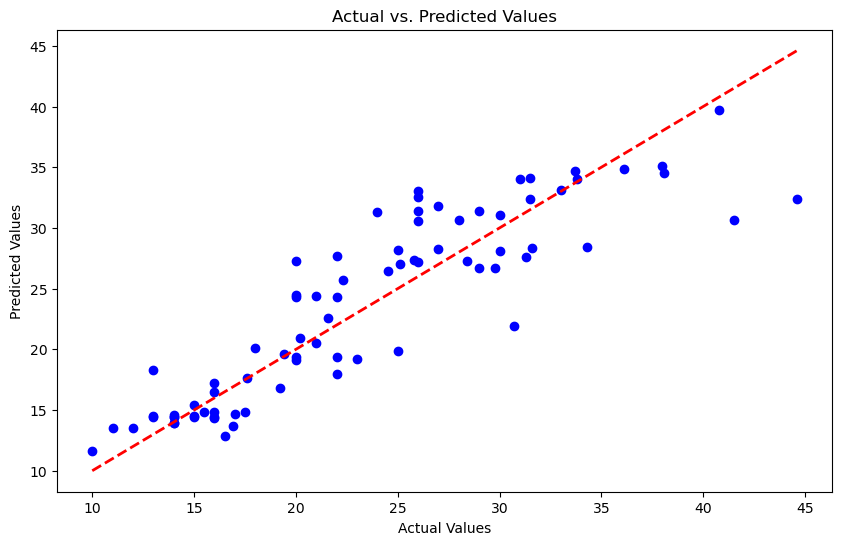

In [26]:
#plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

Predictions Output

In [31]:
dataframe=pd.DataFrame(X_test, columns=['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration']) 

In [32]:
dataframe['original mpg'] = y_test
dataframe['original mpg'] = dataframe['original mpg'].round(2)

dataframe['predicted mpg'] = y_pred
dataframe['predicted mpg'] = dataframe['predicted mpg'].round(2)

In [33]:
dataframe.to_csv('predictions.csv')
dataframe.head()

,weight,cylinders,displacement,horsepower,acceleration,original mpg,predicted mpg
146,2125,4,90.0,75.0,14.5,28.0,30.69
282,2890,4,140.0,88.0,17.3,22.3,25.74
69,4456,8,350.0,160.0,13.5,12.0,13.54
378,2125,4,105.0,63.0,14.7,38.0,35.14
331,2145,4,97.0,67.0,18.0,33.8,34.04
